Initialize KAN

In [1]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=3, k=3, seed=42, device=device)

cpu
checkpoint directory created: ./model
saving model version 0.0


Create dataset

In [2]:
from kan.utils import create_dataset
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

Plot KAN at initialization

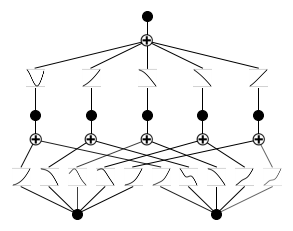

In [3]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot()

Train KAN with sparsity regularization

In [4]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 1.96e-02 | test_loss: 1.94e-02 | reg: 5.69e+00 | : 100%|█| 50/50 [00:18<00:00,  2.68it

saving model version 0.1


Plot trained KAN

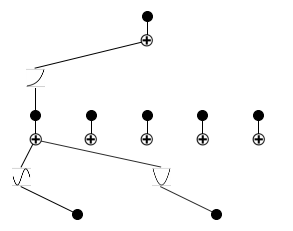

In [5]:
model.plot()


Prune KAN and replot

saving model version 0.2


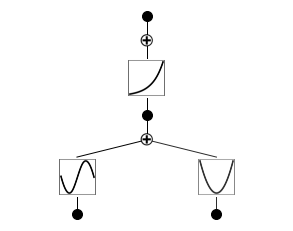

In [6]:
model = model.prune()
model.plot()

Continue training and replot

In [7]:
model.fit(dataset, opt="LBFGS", steps=50);


| train_loss: 1.77e-02 | test_loss: 1.70e-02 | reg: 8.22e+00 | : 100%|█| 50/50 [00:07<00:00,  6.25it


saving model version 0.3


In [8]:
model = model.refine(10)


saving model version 0.4


In [9]:
model.fit(dataset, opt="LBFGS", steps=50);


| train_loss: 4.64e-04 | test_loss: 4.71e-04 | reg: 8.17e+00 | : 100%|█| 50/50 [00:08<00:00,  6.10it


saving model version 0.5


Automatically or manually set activation functions to be symbolic

In [10]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.999999919572659, c=2
fixing (0,1,0) with x^2, r2=0.9999999823183098, c=2
fixing (1,0,0) with exp, r2=0.9999999910340671, c=2
saving model version 0.6


Continue training till machine precision

In [11]:
model.fit(dataset, opt="LBFGS", steps=50);


| train_loss: 7.93e-10 | test_loss: 5.16e-10 | reg: 0.00e+00 | : 100%|█| 50/50 [00:02<00:00, 17.61it

saving model version 0.7


Obtain the symbolic formula

In [12]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(1.0*x_2**2 + 1.0*sin(3.1416*x_1))